In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')

In [55]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
merged = pd.concat([train,test], sort = False)
merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
train.shape

(891, 12)

In [60]:
test.shape

(418, 11)

In [61]:
merged.shape

(1309, 12)

In [62]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


**Three float variables:** 
- Age, Fare, and Survived.

**Four int variables:** 
- Pclass, SibSp, Parch and PassengerId

**Five Object(number+strings) variables:** 
- Name, Sex, Ticket, Cabin, and Embarked.

**Visualiation for the missing values**

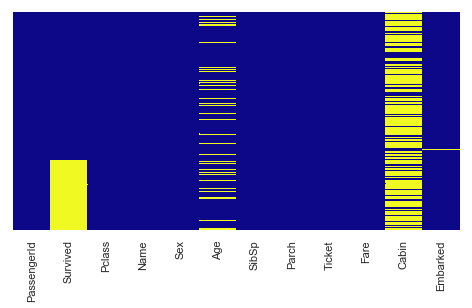

In [68]:
plt.figure(figsize=(8,4))
sns.heatmap(merged.isnull(), yticklabels=False, cbar=False, cmap='plasma')

**3. Feature Engineering Or Data Preprocessing**

In this section, we transform raw data into understandable format. We would engineer features like Cabin, Name, SibSp & Parch, and Ticket that could tell us something about survival or death once they're processed.

# Cabin

In [64]:
merged['Cabin'].isnull().sum()

1014

In [65]:
merged['Cabin'].value_counts().head()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
D                  4
Name: Cabin, dtype: int64

- there are 1014 missing values in Cabin variable

- We will flag NaN as 'X' and keep only the 1st character where Cabin has alphanumeric values.

In [82]:
# let's fill all NaNs of cabin as 'X'
merged['Cabin'].fillna(value = 'X', inplace=True)

In [87]:
merged['Cabin'] = merged['Cabin'].apply(lambda x: x[0])
merged['Cabin'].value_counts().head()

X    1014
C      94
B      65
D      46
E      41
Name: Cabin, dtype: int64

# Name

- This column contains string that furth contains titles such as Mr, Mrs, Master etc.

- These title give us useful information about sex and age for example Mr=Male, Mrs=Female and married, miss= Female and young.

- Now we want to extract these titles from Name to check if there is any association between these titles and Survived.

In [88]:
# Extracting title from Name and create a new variable Title.
merged['Title'] = merged['Name'].str.extract('([A-Za-z]+)\.')
merged['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [89]:
# let's see the different categories of Title from Name column.
merged['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Ms            2
Mlle          2
Lady          1
Jonkheer      1
Dona          1
Sir           1
Capt          1
Countess      1
Don           1
Mme           1
Name: Title, dtype: int64

- We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets.

- Professionals like Dr, Rev, Col, Major, Capt will be put into 'Officer' bucket.

- Titles such as Dona, Jonkheer, Countess, Sir, Lady, Don were usually entitled to the aristocrats.

- We would also replace Mlle and Ms with Miss and Mme by Mrs as these are French titles.


In [90]:
# Replacing  Dr, Rev, Col, Major, Capt with 'Officer'
merged['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace=True)

# Replacing Dona, Jonkheer, Countess, Sir, Lady with 'Aristocrate'
merged['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

#  Replace Mlle and Ms with Miss. And Mme with Mrs.
merged['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [91]:
# let's see how Tittle looks now
merged['Title'].value_counts()

Mr            757
Miss          264
Mrs           198
Master         61
Officer        23
Aristocrat      6
Name: Title, dtype: int64

# SibSp & Parch

In [95]:
# Merging Sibsp and Parch and creating new variable called 'Family_size'
merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
merged['Family_size'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

- We see there are several family sizes with the very least frequency like 2,3 and some have large frequency 7,8,11

- We will create 4 buckets namely single, small, medium, and large for rest of them.

In [96]:
# Create buckets of single, small, medium, and large and then put respective values into them.
merged['Family_size'].replace(to_replace = [1], value = 'single', inplace = True)
merged['Family_size'].replace(to_replace = [2,3], value = 'small', inplace = True)
merged['Family_size'].replace(to_replace = [4,5], value = 'medium', inplace = True)
merged['Family_size'].replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

In [97]:
merged['Family_size'].value_counts()

single    790
small     394
medium     65
large      60
Name: Family_size, dtype: int64

# Tickets

In [98]:
# let's preview the Ticket variable.
merged['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

- Ticket variable contains alphanumeric, only numbers and character type variables.
- We will create two groups-one will contain just number and other will only contain character extracted from string.
- And assign 'N' to the number type variable.
- If a row contains both character and number, we will keep only character.

In [99]:
# Assign N if there is only number and no character. If there is a character, extract the character only.
ticket = []
for x in list(merged['Ticket']):
    if x.isdigit():
        ticket.append('N')
    else:
         ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
# Swap values
merged['Ticket'] = ticket

In [101]:
# Keeping only the 1st character to reduce the Ticket categories
merged['Ticket'] = merged['Ticket'].apply(lambda x : x[0])
merged['Ticket'].value_counts()

N    957
S     98
P     98
C     77
A     42
W     19
F     13
L      5
Name: Ticket, dtype: int64

# 3.5 Outliers Detection

In [105]:
merged.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


**count the outliers**

iqr method is to set the lower and upper fences to detect the outliers

In [106]:
def outliers(variable):
    # Global keyword is used inside a function only when we want to do assignments or when we want to change a variable.
    global filtered
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    filtered = variable.drop(outliers.index, axis = 0)

# outliers detection: Fare

In [147]:
# Total number of outliers in Fare
outliers(merged['Fare'])

Total Outliers of Fare : 171


Text(0.5, 1.0, 'Fare distribution with outliers')

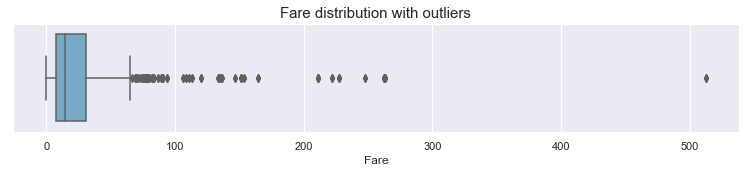

In [148]:
# Visualisation of Fare distribution with outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=merged["Fare"],palette='Blues')
plt.title('Fare distribution with outliers', fontsize=15 )

Text(0.5, 1.0, 'Fare distribution without outliers')

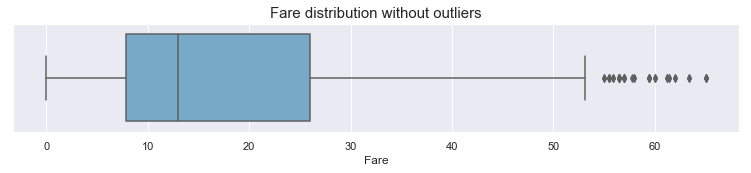

In [149]:
# Visualisation of Fare distribution without outliers
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered,palette='Blues')
plt.title('Fare distribution without outliers', fontsize=15 )

# age

In [150]:
outliers(merged['Age'])

Total Outliers of Age : 9


Text(0.5, 1.0, 'age distribution with outliers')

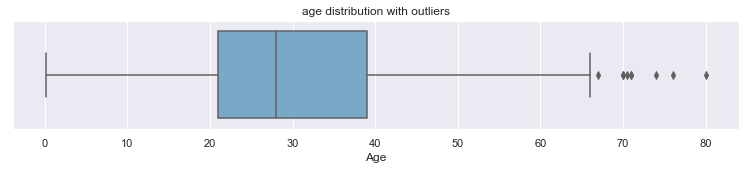

In [151]:
plt.figure(figsize=(13,2))
sns.boxplot(x=merged['Age'], palette='Blues')
plt.title("age distribution with outliers")

Text(0.5, 1.0, 'age distribution without outliers')

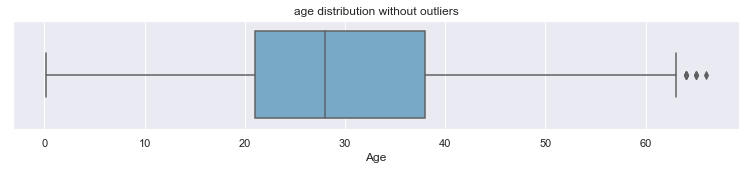

In [152]:
plt.figure(figsize=(13,2))
sns.boxplot(x=filtered, palette='Blues')
plt.title("age distribution without outliers")

There is various techniques to imputing missing variable in the datasets for exmaple linear regession, K-NN, Mean/mode/median, Deep learning etc. 

One clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant (like Age). So simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

In [153]:
# let's count the missing values for each variable
merged.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Title            0
Family_size      0
dtype: int64

Survived column is showing missing values becuase in test.csv don't have the survived column.
Age, Cabin, Fare and Embarked has missing values.

3.4.1 Imputing **Embarked** and **Fare**

In [154]:
# imputing Embarked with mode because Embarked is a categorical variable.
merged['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Here S is the most frequent

In [155]:
merged['Embarked'].fillna(value = 'S', inplace = True)

Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.

In [157]:
merged['Fare'].fillna(value = merged['Fare'].median(), inplace = True)

3.4.2 Impute **Age**

To impute Age with grouped median, we need to know which features are heavily correlated with Age. Let's find out the variables correlated with Age.

It is important to plot **correlation heatmap** to see which variable is highly correlated with Age. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical.

In [172]:
df = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]

In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform) # data is converted
df.head(2)

,Sex,Pclass,Embarked,Title,Family_size,Parch,SibSp,Cabin,Ticket
0,1,2,2,3,3,0,1,8,0
1,0,0,0,4,3,0,1,2,5


In [177]:
 # Inserting Age in variable correlation.
df['Age'] = merged['Age']
df=df.set_index('Age').reset_index()
df.head(2)

,Age,Sex,Pclass,Embarked,Title,Family_size,Parch,SibSp,Cabin,Ticket
0,22.0,1,2,2,3,3,0,1,8,0
1,38.0,0,0,0,4,3,0,1,2,5
